In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv(r'diamonds.csv')
df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [70]:
df.shape

(53940, 11)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [72]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [73]:
df.describe(include='object')

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

### DATA CLEANING

In [74]:
df.duplicated().sum()

0

In [75]:
df.isnull().sum()[df.isnull().sum()>1]

Series([], dtype: int64)

In [76]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [77]:
for i in df.describe(include='object').columns:
    print(i)
    print(f'Nunique: {df[i].nunique()}')
    print(f'Unique: {df[i].unique()}')
    print(30*'==')

cut
Nunique: 5
Unique: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color
Nunique: 7
Unique: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity
Nunique: 8
Unique: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [78]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [79]:
df1=df.copy(deep=True)

### EDA

### Price

In [80]:
sns.distplot(df.price)

<Axes: xlabel='price', ylabel='Density'>

<Axes: xlabel='price'>

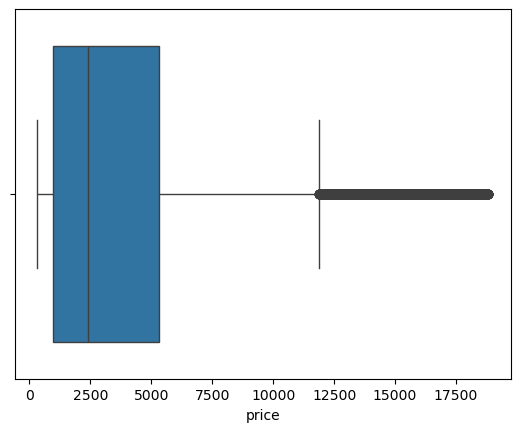

In [83]:
sns.boxplot(x=df.price)

### Price vs Carat

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Scatter Plot of Diamond Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

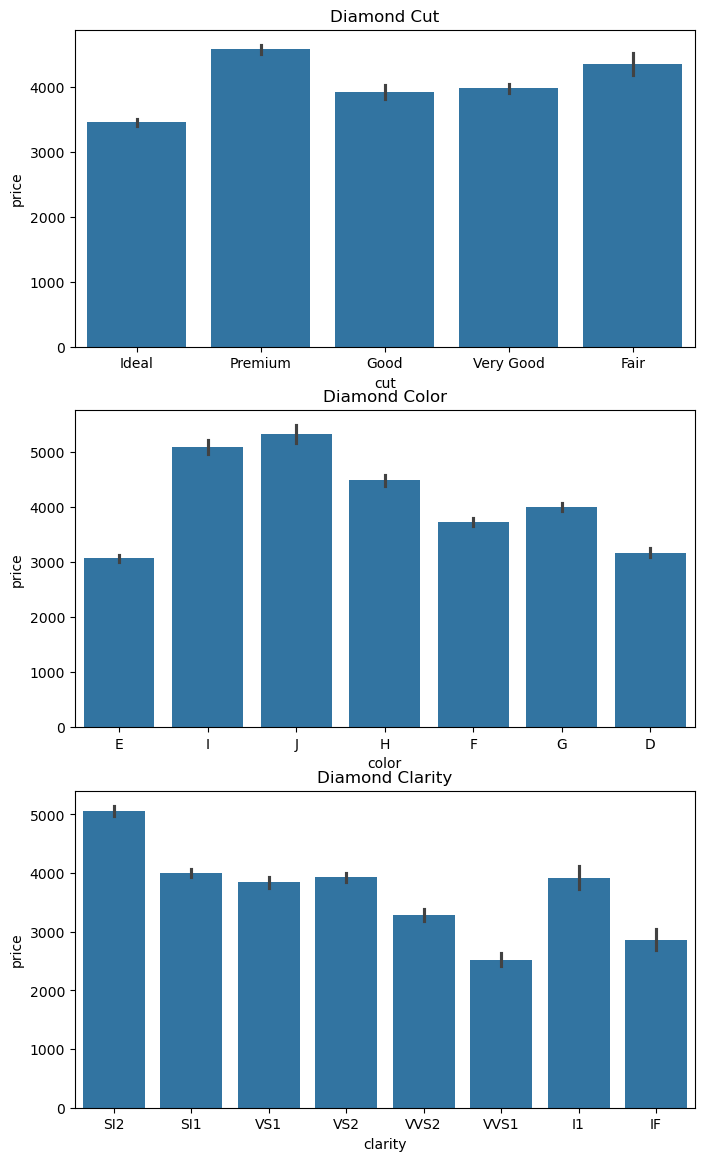

In [99]:
plt.figure(figsize=(8, 14))

# Diamond Cut vs Price
plt.subplot(3, 1, 1)
sns.barplot(x='cut',y='price' ,data=df)
plt.title('Diamond Cut')

# Diamond Color vs Price
plt.subplot(3, 1, 2)
sns.barplot(x='color',y='price' , data=df)
plt.title('Diamond Color')

# Diamond Clarity vs Price
plt.subplot(3, 1, 3)
sns.barplot(x='clarity',y='price' , data=df)
plt.title('Diamond Clarity')
plt.show()

carat


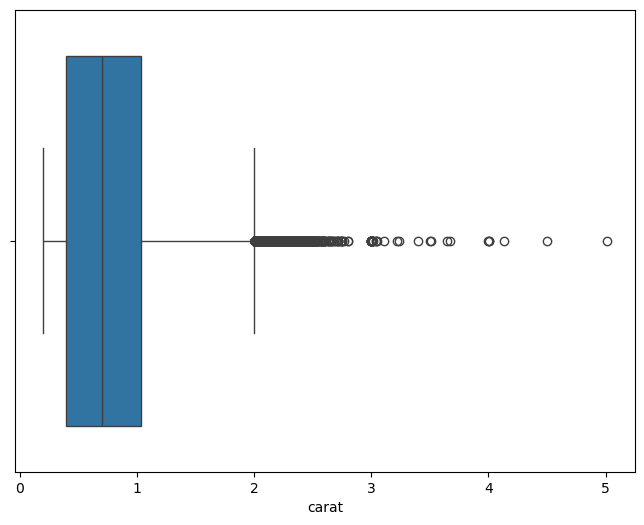

depth


table


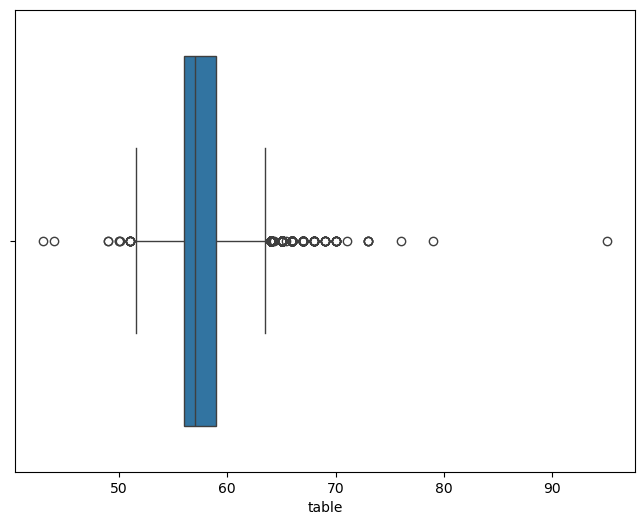

price


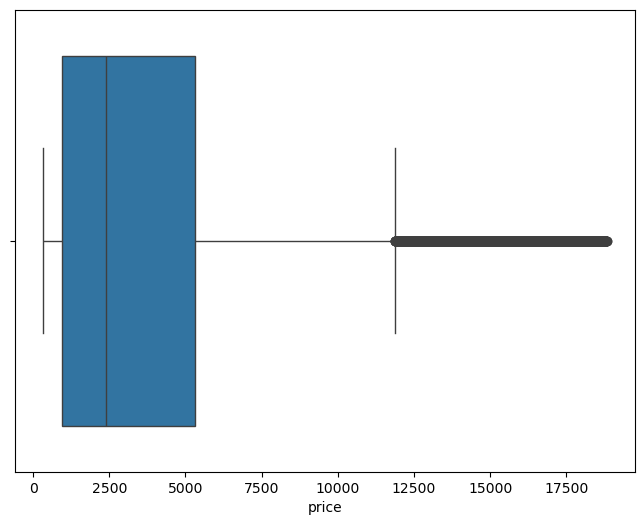

x


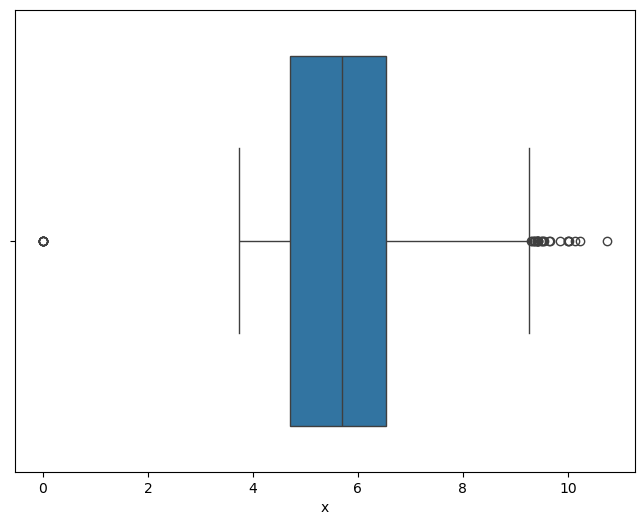

y


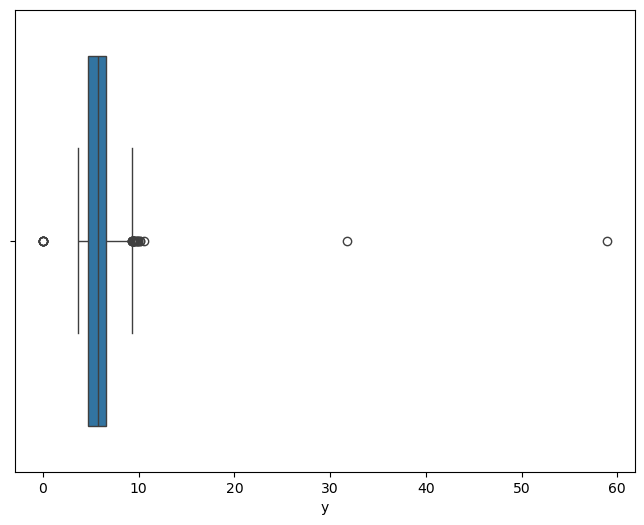

z


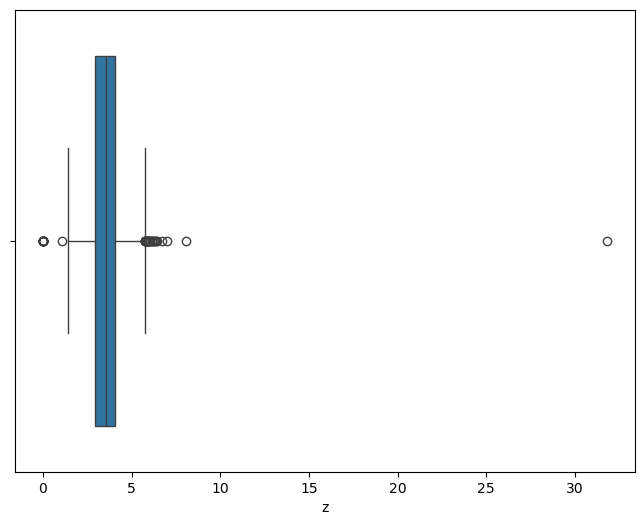

In [105]:
for i in df.describe().columns:
    print(i)
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[i])
    plt.show()

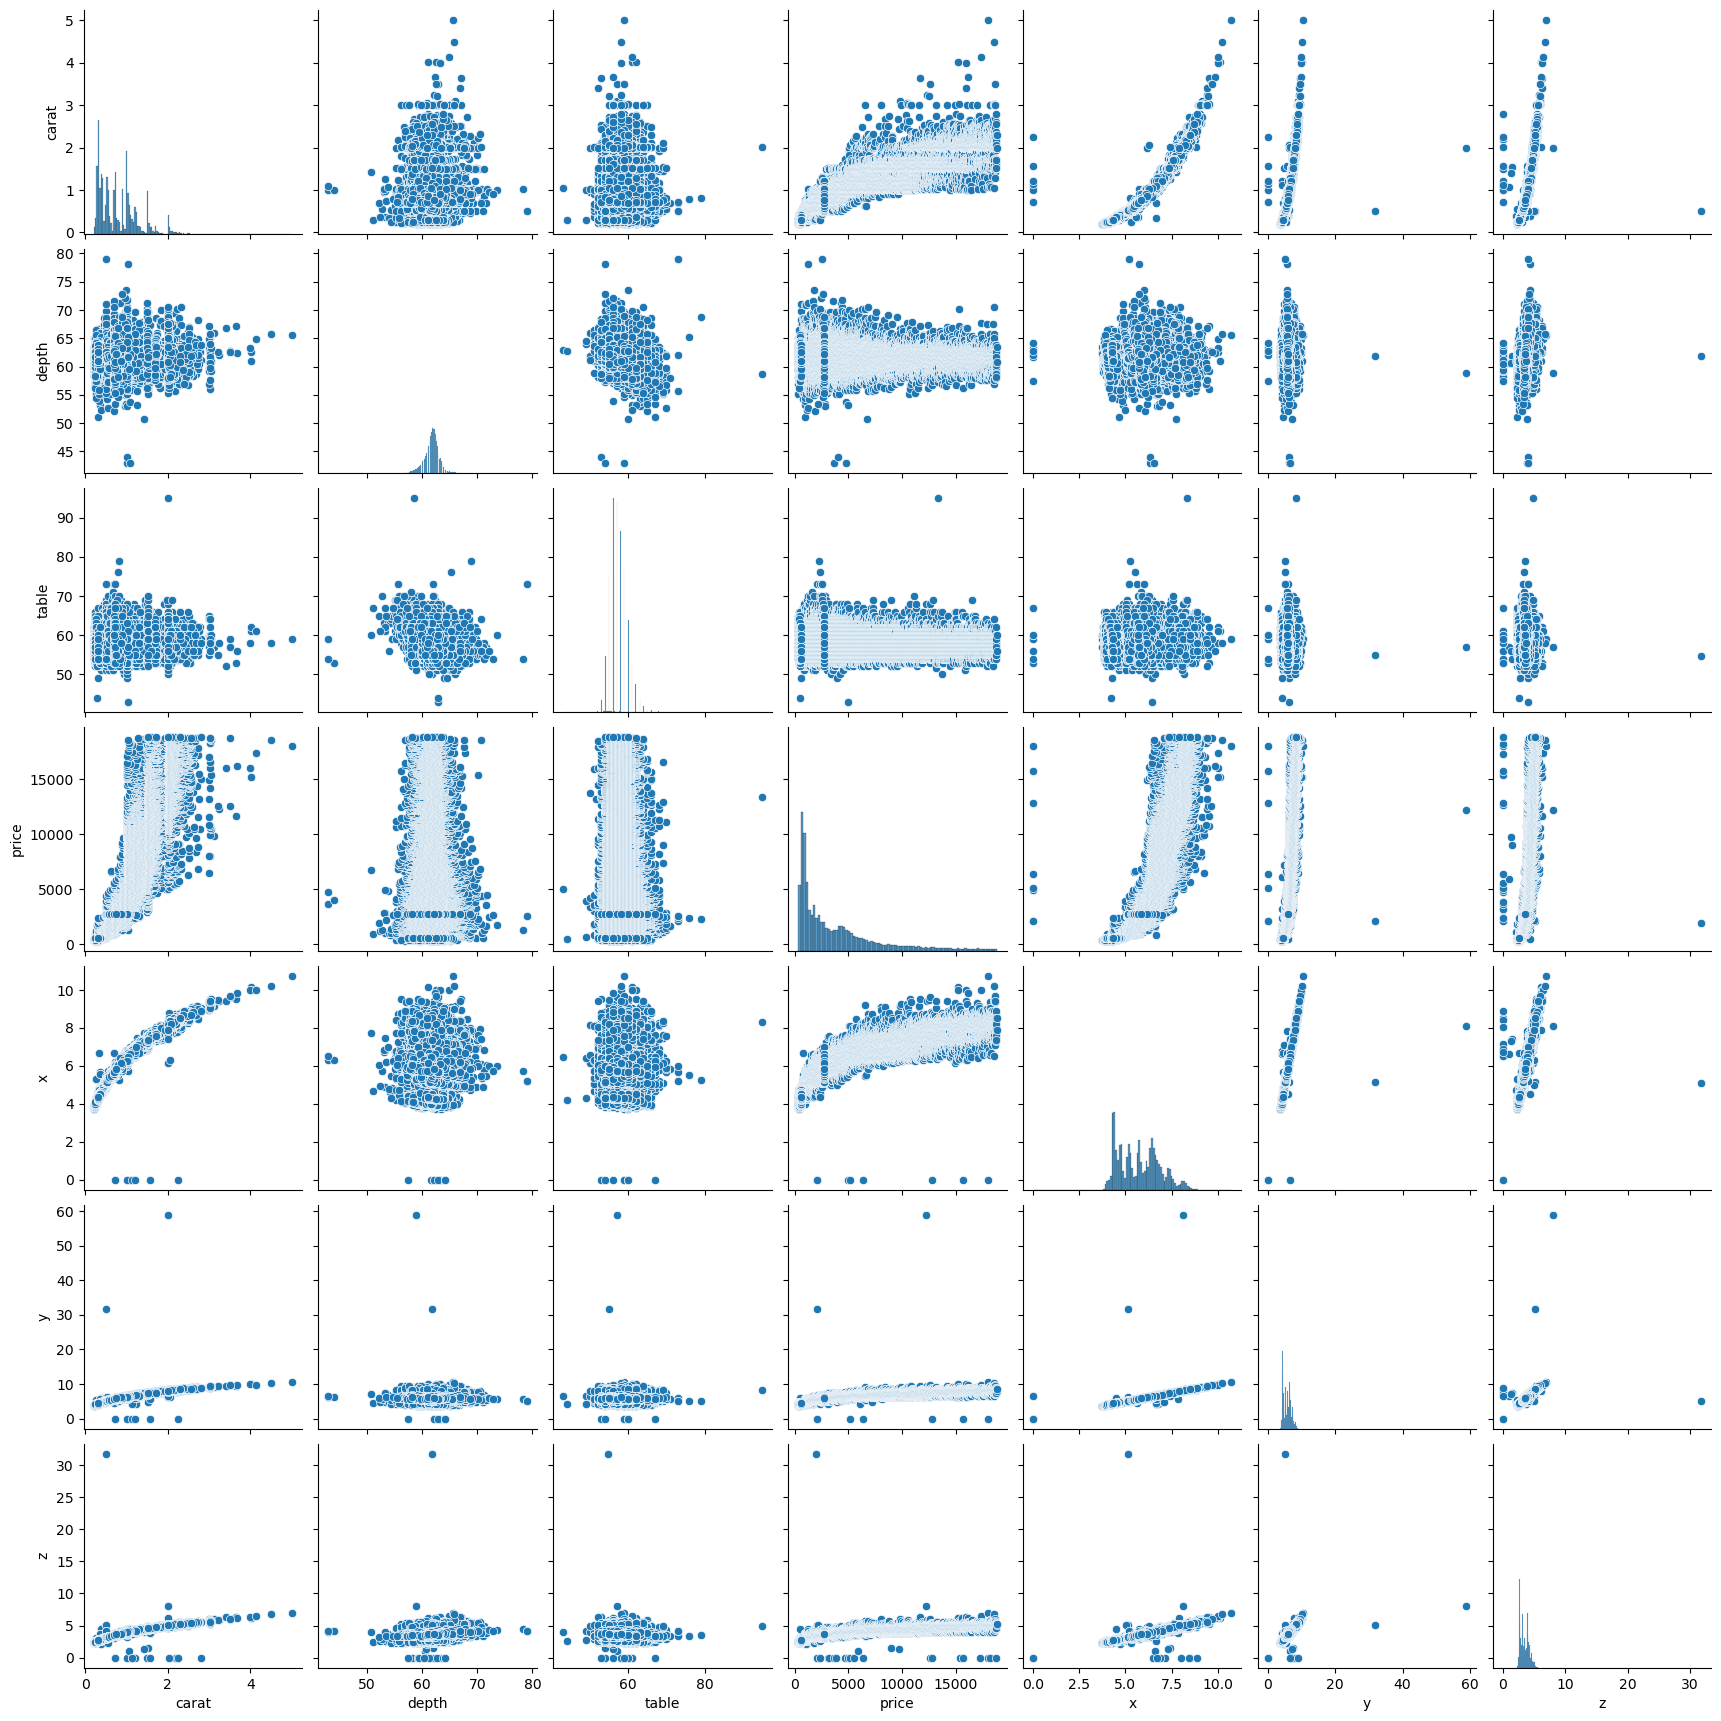

In [106]:
sns.pairplot(df)

<Axes: >

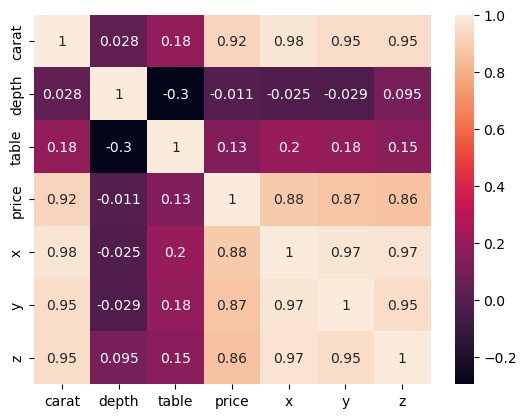

In [107]:
sns.heatmap(df.corr(),annot=True)

### Model Building

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [110]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

numerical_data = df.iloc[:,[0,4,5,6,7,8,9]].values

standardized_data = sc_x.fit_transform(numerical_data)

df_standardized = pd.DataFrame(standardized_data, columns=df.columns[3:])
df_standardized


clarity     depth     table     price         x         y         z
0     -1.198168 -0.174092 -1.099672 -0.904095 -1.587837 -1.536196 -1.571129
1     -1.240361 -1.360738  1.585529 -0.904095 -1.641325 -1.658774 -1.741175
2     -1.198168 -3.385019  3.375663 -0.903844 -1.498691 -1.457395 -1.741175
3     -1.071587  0.454133  0.242928 -0.902090 -1.364971 -1.317305 -1.287720
4     -1.029394  1.082358  0.242928 -0.901839 -1.240167 -1.212238 -1.117674
...         ...       ...       ...       ...       ...       ...       ...
53935 -0.164427 -0.662711 -0.204605 -0.294731  0.016798  0.022304 -0.054888
53936 -0.164427  0.942753 -1.099672 -0.294731 -0.036690  0.013548  0.100988
53937 -0.206621  0.733344  1.137995 -0.294731 -0.063434 -0.047741  0.030135
53938  0.130927 -0.523105  0.242928 -0.294731  0.373383  0.337506  0.285204
53939 -0.101137  0.314528 -1.099672 -0.294731  0.088115  0.118616  0.143499

[53940 rows x 7 columns]

In [113]:
df_final1 = pd.concat([df.iloc[:,[1,2,3]], df_standardized], axis=1)
df_final1.head()

cut color  clarity   clarity     depth     table     price         x  \
0    Ideal     E      SI2 -1.198168 -0.174092 -1.099672 -0.904095 -1.587837   
1  Premium     E      SI1 -1.240361 -1.360738  1.585529 -0.904095 -1.641325   
2     Good     E      VS1 -1.198168 -3.385019  3.375663 -0.903844 -1.498691   
3  Premium     I      VS2 -1.071587  0.454133  0.242928 -0.902090 -1.364971   
4     Good     J      SI2 -1.029394  1.082358  0.242928 -0.901839 -1.240167   

          y         z  
0 -1.536196 -1.571129  
1 -1.658774 -1.741175  
2 -1.457395 -1.741175  
3 -1.317305 -1.287720  
4 -1.212238 -1.117674

In [114]:
df_final=pd.get_dummies(df_final1,drop_first=True)
df_final

clarity     depth     table     price         x         y         z  \
0     -1.198168 -0.174092 -1.099672 -0.904095 -1.587837 -1.536196 -1.571129   
1     -1.240361 -1.360738  1.585529 -0.904095 -1.641325 -1.658774 -1.741175   
2     -1.198168 -3.385019  3.375663 -0.903844 -1.498691 -1.457395 -1.741175   
3     -1.071587  0.454133  0.242928 -0.902090 -1.364971 -1.317305 -1.287720   
4     -1.029394  1.082358  0.242928 -0.901839 -1.240167 -1.212238 -1.117674   
...         ...       ...       ...       ...       ...       ...       ...   
53935 -0.164427 -0.662711 -0.204605 -0.294731  0.016798  0.022304 -0.054888   
53936 -0.164427  0.942753 -1.099672 -0.294731 -0.036690  0.013548  0.100988   
53937 -0.206621  0.733344  1.137995 -0.294731 -0.063434 -0.047741  0.030135   
53938  0.130927 -0.523105  0.242928 -0.294731  0.373383  0.337506  0.285204   
53939 -0.101137  0.314528 -1.099672 -0.294731  0.088115  0.118616  0.143499   

       cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  \
0             0          1            0              0        1        0   
1             0          0            1              0        1        0   
2             1          0            0              0        1        0   
3             0          0            1              0        0        0   
4             1          0            0              0        0        0   
...         ...        ...          ...            ...      ...      ...   
53935         0          1            0              0        0        0   
53936         1          0            0              0        0        0   
53937         0          0            0              1        0        0   
53938         0          0            1              0        0        0   
53939         0          1            0              0        0        0   

       color_G  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0            0        0        0        0           0            0   
1            0        0        0        0           0            1   
2            0        0        0        0           0            0   
3            0        0        1        0           0            0   
4            0        0        0        1           0            0   
...        ...      ...      ...      ...         ...          ...   
53935        0        0        0        0           0            1   
53936        0        0        0        0           0            1   
53937        0        0        0        0           0            1   
53938        0        1        0        0           0            0   
53939        0        0        0        0           0            0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0                1            0            0             0             0  
1                0            0            0             0             0  
2                0            1            0             0             0  
3                0            0            1             0             0  
4                1            0            0             0             0  
...            ...          ...          ...           ...           ...  
53935            0            0            0             0             0  
53936            0            0            0             0             0  
53937            0            0            0             0             0  
53938            1            0            0             0             0  
53939            1            0            0             0             0  

[53940 rows x 24 columns]

In [117]:
x=df_final.drop('price',axis=1)
x.head(2)

clarity     depth     table         x         y         z  cut_Good  \
0 -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -1.571129         0   
1 -1.240361 -1.360738  1.585529 -1.641325 -1.658774 -1.741175         0   

   cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  color_G  color_H  \
0          1            0              0        1        0        0        0   
1          0            1              0        1        0        0        0   

   color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  \
0        0        0           0            0            1            0   
1        0        0           0            1            0            0   

   clarity_VS2  clarity_VVS1  clarity_VVS2  
0            0             0             0  
1            0             0             0

In [118]:
y=pd.DataFrame(df['price'])
y.head(2)

price
0    326
1    326

In [119]:
# load the library for spliting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.20,random_state=0)  #train_size is 80%

In [120]:
# Libaries for Model Building 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [121]:
# Model Building 
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

In [122]:
for i in range(5):
    models[i].fit(x_train,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(x_train)
    y_pred_test=models[i].predict(x_test)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()

LinearRegression(): 
MSE_train:  1283832.0142782095
MSE_test:  1248486.7135639724
RMSE_train:  1133.0631113394388
RMSE_test:  1117.3570215307068
R2_score_train:  0.919414200999963
R2_score_test:  0.9212394719973422

DecisionTreeRegressor(): 
MSE_train:  71.42620272525028
MSE_test:  751284.8652206155
RMSE_train:  8.451402411745063
RMSE_test:  866.7669036255454
R2_score_train:  0.9999955165959782
R2_score_test:  0.9526053485212767

RandomForestRegressor(): 
MSE_train:  54113.14871898513
MSE_test:  413303.6320125692
RMSE_train:  232.62233065418533
RMSE_test:  642.8869511917077
R2_score_train:  0.9966033318398132
R2_score_test:  0.9739268252284383

GradientBoostingRegressor(): 
MSE_train:  701055.5989731575
MSE_test:  732365.3836621526
RMSE_train:  837.2906299327358
RMSE_test:  855.7834911133497
R2_score_train:  0.9559949238230643
R2_score_test:  0.9537988801310984

KNeighborsRegressor(): 
MSE_train:  447236.2116833519
MSE_test:  683615.7324471636
RMSE_train:  668.75721430378
RMSE_test:  8